In [1]:
import pandas as pd
import altair as alt
from vega_datasets import data

alt.data_transformers.enable('json')
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('json')

### LOAD THE CLEAN CSV

In [2]:
df = pd.read_csv('../data/cleaned_data.csv',
                 usecols=['points', 'title', 'description', 'price',
                           'designation', 'variety', 'winery', 'county',
                           'county_id', 'state_id', 'value', 'state', 'region_1'])

In [3]:
df.head()

,points,title,description,price,designation,variety,region_1,state,winery,county,county_id,state_id,value
0,87,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",13.0,Reserve Late Harvest,Riesling,Lake Michigan Shore,Michigan,St. Julian,Van Buren County,26159,26,6.692308
1,85,St. Julian NV Cathermsn's Port (Lake Michigan ...,Stewed fig and blackberry aromas meet a dried ...,16.0,Cathermsn's,Port,Lake Michigan Shore,Michigan,St. Julian,Van Buren County,26159,26,5.312500
2,83,St. Julian 2013 Braganini Reserve Traminette (...,A citrus-rind aroma takes on an earthy bee-pol...,15.0,Braganini Reserve,Traminette,Michigan,Michigan,St. Julian,Van Buren County,26159,26,5.533333
3,86,St. Julian NV Solera Cream Sherry (Lake Michig...,Aromas of roasted almond and pecan meet dried ...,16.0,Solera Cream,Sherry,Lake Michigan Shore,Michigan,St. Julian,Van Buren County,26159,26,5.375000
4,88,St. Julian 2013 Braganini Reserve Late Harvest...,Candied peach and apricot aromas meld with dus...,20.0,Braganini Reserve Late Harvest,Vignoles,Lake Michigan Shore,Michigan,St. Julian,Van Buren County,26159,26,4.400000


In [4]:
winery_df = df.groupby(['variety']).size().reset_index(name='counts')
winery_df = winery_df.sort_values(by='counts')

print("Greater than 100", len(winery_df.query('counts > 100')))
print("Greater than 500",len(winery_df.query('counts > 500')))
print("Greater than 1000", len(winery_df.query('counts > 1000')))

# for i, group in winery_df.iterrows():
#     print(group['counts'])
#     if winery_df.query('counts == @i').sum()['counts'] > 0:
#         print(i, winery_df.query('counts == @i').sum()['counts'])
    

Greater than 100 35
Greater than 500 19
Greater than 1000 10


In [5]:
winery_df = df.groupby(['winery']).size().reset_index(name='counts')
winery_df = winery_df.sort_values(by='counts')

print("Greater than 10", len(winery_df.query('counts > 10')))
print("Greater than 50",len(winery_df.query('counts > 50')))
print("Greater than 100", len(winery_df.query('counts > 100')))

Greater than 10 1362
Greater than 50 163
Greater than 100 16


In [6]:
df.query('county == "Pinellas County"')

,points,title,description,price,designation,variety,region_1,state,winery,county,county_id,state_id,value


In [7]:
state_counts = df.groupby(['state', 'state_id']).size().reset_index(name='counts')
county_counts = df.groupby(['county', 'county_id']).size().reset_index(name='counts')
county_counts

,county,county_id,counts
0,Ada County,16001,58
1,Adams County,8001,3
2,Alameda County,6001,877
3,Albemarle County,51003,120
4,Allegan County,26005,7
...,...,...,...
233,Yamhill County,41071,2737
234,Yates County,36123,400
235,Yavapai County,4025,35
236,Yolo County,6113,236


### GET THE COUNTS BY STATE AND COUNTY

In [8]:
# Group and aggregate the data by States
states_grouped = df.groupby(['state', 'state_id'], as_index=False)
wine_states = states_grouped.agg({'points': ['mean'],
                                  'price': ['mean'],
                                  'value': ['mean'],
                                  'description': ['count']})

wine_states.columns = wine_states.columns.droplevel(level=1)
wine_states = wine_states.rename(columns={"state": "State",
                                          "state_id": "State ID",
                                          "description": "Num Reviews",
                                          "points": 'Ave Points',
                                          "price": 'Ave Price',
                                          "value": 'Ave Value'})

# Group and aggregate the data by Counties
counties_grouped = df.groupby(['county', 'county_id'], as_index=False)
wine_counties = counties_grouped.agg({'points': ['mean'],
                                     'price': ['mean'],
                                     'value': ['mean'],
                                     'description': ['count']})

wine_counties.columns = wine_counties.columns.droplevel(level=1)
wine_counties = wine_counties.rename(columns={"county": 'County',
                                              "county_id": 'County ID',
                                              "description": "Num Reviews",
                                              "points": 'Ave Points',
                                              "price": 'Ave Price',
                                              "value": 'Ave Value'})

wine_counties

,County,County ID,Ave Points,Ave Price,Ave Value,Num Reviews
0,Ada County,16001,87.103448,24.344828,3.917436,58
1,Adams County,8001,87.666667,16.666667,5.263480,3
2,Alameda County,6001,87.743444,31.269187,3.631428,877
3,Albemarle County,51003,86.466667,26.756303,3.538235,120
4,Allegan County,26005,85.000000,33.428571,2.878045,7
...,...,...,...,...,...,...
233,Yamhill County,41071,89.762879,42.212088,2.707723,2737
234,Yates County,36123,87.442500,21.919799,4.585298,400
235,Yavapai County,4025,85.371429,29.705882,3.394419,35
236,Yolo County,6113,86.491525,18.914894,5.534573,236


### DRAW STATE CHOROPLETH

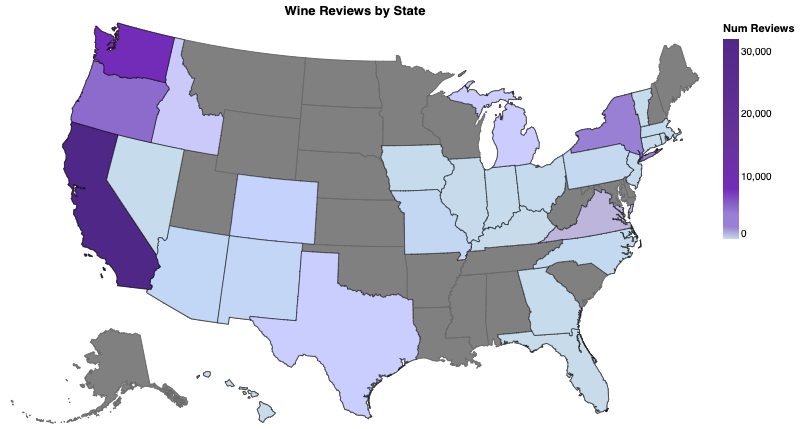

In [22]:
#  ['State','State_ID','Ave Points','Ave Price','Ave Value','Num Reviews'])

counties = alt.topo_feature(data.us_10m.url, 'counties')
states = alt.topo_feature(data.us_10m.url, "states")

colormap = alt.Scale(domain=[0, 100, 1000, 2000, 4000, 8000, 16000, 32000],
                     range=['#C7DBEA', '#CCCCFF', '#B8AED2', '#3A41C61',
                            '#9980D4', '#722CB7', '#663399', '#512888'])

foreground = alt.Chart(states).mark_geoshape().encode(
    color=alt.Color('Num Reviews:Q',
                    scale=colormap),
    tooltip=['State:O', 'State ID:O', 
             'Ave Points:Q','Ave Price:Q',
             'Ave Value:Q','Num Reviews:Q']
).mark_geoshape(
    stroke='black',
    strokeWidth=0.5
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(wine_states, 
                         'State ID', 
                         ['State', 'State ID', 'Ave Points', 'Ave Price', 'Ave Value', 'Num Reviews'])
).project(
    type='albersUsa'
)

background = alt.Chart(states).mark_geoshape(
    fill='gray',
    stroke='dimgray'
).project(
    'albersUsa'
).properties(
    title='Wine Reviews by State'
)

(background + foreground).configure_view(
    height=400,
    width=700,
    strokeWidth=4,
    fill=None,
    stroke=None,
)

### DRAW STATE/COUNTY CHOROPLETH

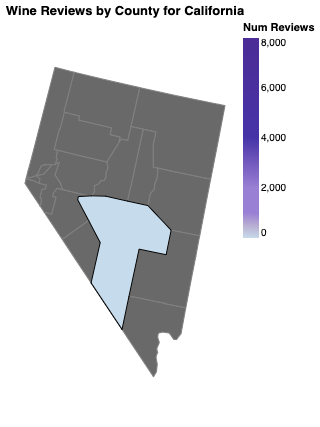

In [24]:
counties = alt.topo_feature(data.us_10m.url, 'counties')

state_id = 32#California = 6
state = 'California'

colormap = alt.Scale(domain=[0, 100, 500, 1000, 2000, 4000, 8000],
                     range=['#C7DBEA', '#CCCCFF', '#B8AED2', '#3A41C61',
                            '#9980D4', '#4634A7', '#4C2C96'])

c_foreground =(
    alt.Chart(counties)
    .mark_geoshape(
        stroke='black',
        strokeWidth=1
    ).encode(
        color=alt.Color('Num Reviews:Q',
              scale=colormap),
        tooltip=['County:O', 'County ID:O', 
                 'Ave Points:Q','Ave Price:Q',
                 'Ave Value:Q','Num Reviews:Q']
    )
    .transform_calculate(state_id = "(datum.id / 1000)|0")
    .transform_filter((alt.datum.state_id)==state_id)
    .transform_lookup(
        lookup='id',
        from_=alt.LookupData(wine_counties, 
                             'County ID', 
                             ['County', 'County ID', 'Ave Points', 'Ave Price', 'Ave Value', 'Num Reviews']))
)

c_background = alt.Chart(counties).mark_geoshape(
    fill='dimgray',
    stroke='gray'
).transform_calculate(state_id = "(datum.id / 1000)|0",
).transform_filter((alt.datum.state_id)==state_id,
).properties(
    title=f'Wine Reviews by County for {state}'
).project('albersUsa')

(c_background + c_foreground).configure_view(
    height=400,
    width=200,
    strokeWidth=4,
    fill=None,
    stroke=None,
)

### DRAW THE COUNTIES ON THE COUNTRY

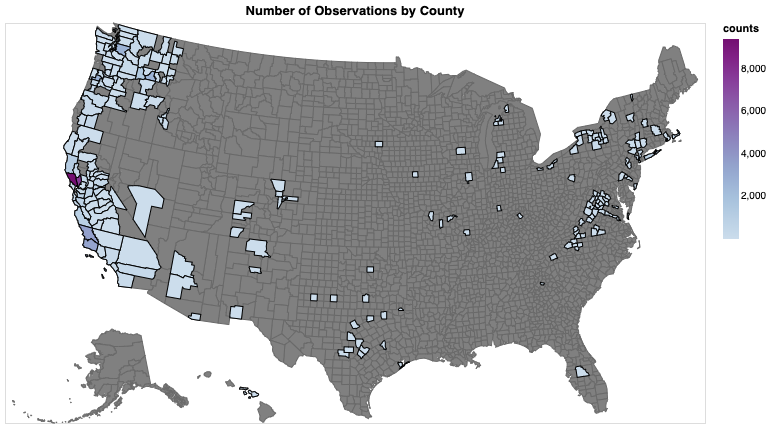

In [196]:
counties = alt.topo_feature(data.us_10m.url, 'counties')

foreground = alt.Chart(counties).mark_geoshape().encode(
    color=alt.Color('counts:Q',
                    scale=alt.Scale(scheme='bluepurple'))
).mark_geoshape(
    stroke='black',
    strokeWidth=1
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(county_counts, 'county_id', ['counts'])
).project(
    type='albersUsa'
).properties(
    width=500,
    height=300
)

background = alt.Chart(counties).mark_geoshape(
    fill='gray',
    stroke='dimgray'
).properties(
    title='Number of Observations by County',
    width=700,
    height=400
).project('albersUsa')

background + foreground